Final Predictions:
[[4.49378613e-04]
 [4.70508112e-04]
 [5.50779503e-04]
 [9.27334852e-04]
 [4.30819797e-03]
 [1.10089252e-01]
 [8.83558365e-01]
 [9.90217059e-01]
 [9.96450698e-01]
 [9.97433317e-01]
 [9.97668595e-01]]


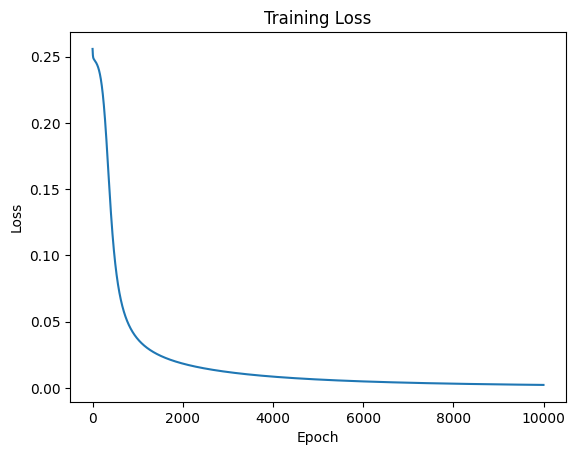

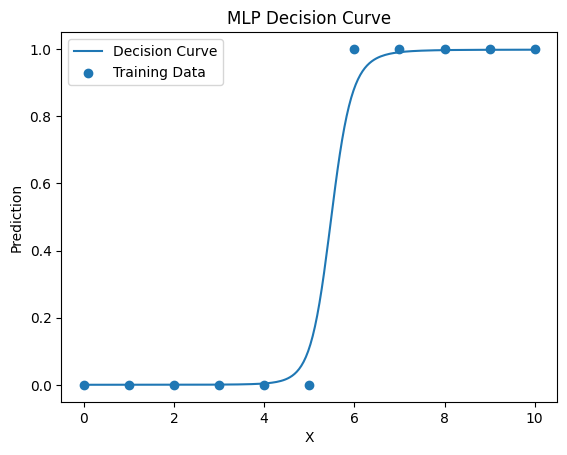

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Activation Function ----------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# ---------------- MLP Class ----------------
class SimpleMLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))

        # Initialize biases
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

        self.loss_history = []

    # Forward pass
    def forward(self, X):
        self.hidden_linear = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_activation = sigmoid(self.hidden_linear)

        self.output_linear = np.dot(self.hidden_activation, self.weights_hidden_output) + self.bias_output
        self.output_final = sigmoid(self.output_linear)

        return self.output_final

    # Backpropagation
    def backward(self, X, y, output, learning_rate):
        error = y - output

        # Output layer gradient(adjusting)

        d_output = error * sigmoid_derivative(output)

        # Hidden layer gradient
        error_hidden = d_output.dot(self.weights_hidden_output.T)
        d_hidden = error_hidden * sigmoid_derivative(self.hidden_activation)

        # Update weights & biases
        self.weights_hidden_output += self.hidden_activation.T.dot(d_output) * learning_rate
        self.bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += X.T.dot(d_hidden) * learning_rate
        self.bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Training loop
    def train(self, X, y, epochs, learning_rate):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)

            loss = np.mean(np.square(y - output))
            self.loss_history.append(loss)

# ---------------- Dataset ----------------
# Input values
X = np.arange(11).reshape(-1, 1)

# Output labels
y = np.array([0,0,0,0,0,0,1,1,1,1,1]).reshape(-1, 1)

# Normalize input (important for training)
X = X / 10.0

# ---------------- Train Model ----------------
nn = SimpleMLP(input_size=1, hidden_size=1, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

# ---------------- Predictions ----------------
print("Final Predictions:")
print(nn.forward(X))

# ---------------- Plot Loss ----------------
plt.figure()
plt.plot(nn.loss_history)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

# ---------------- Decision Curve ----------------
X_test = np.linspace(0, 1, 200).reshape(-1, 1)
y_pred = nn.forward(X_test)

plt.figure()
plt.plot(X_test * 10, y_pred, label="Decision Curve")
plt.scatter(np.arange(11), y, label="Training Data")
plt.xlabel("X")
plt.ylabel("Prediction")
plt.title("MLP Decision Curve")
plt.legend()
plt.show()
